In [1]:
from fastai.vision.all import *



In [2]:
path=Path('/home/guardian/Documents/multiclassdata')


In [3]:

data=DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items=get_image_files,
               splitter=RandomSplitter(valid_pct=0.2,seed=42),
               get_y=parent_label,
               item_tfms=RandomResizedCrop(224,min_scale=0.5),
              batch_tfms=aug_transforms())

In [4]:
dls=data.dataloaders(path) 

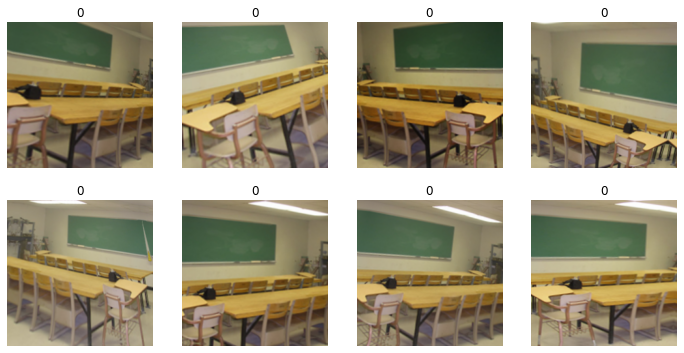

In [5]:
dls.train.show_batch(max_n=8,nrows=2,unique=True)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [7]:
 learn.fine_tune(4)

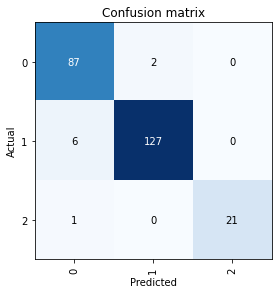

In [8]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

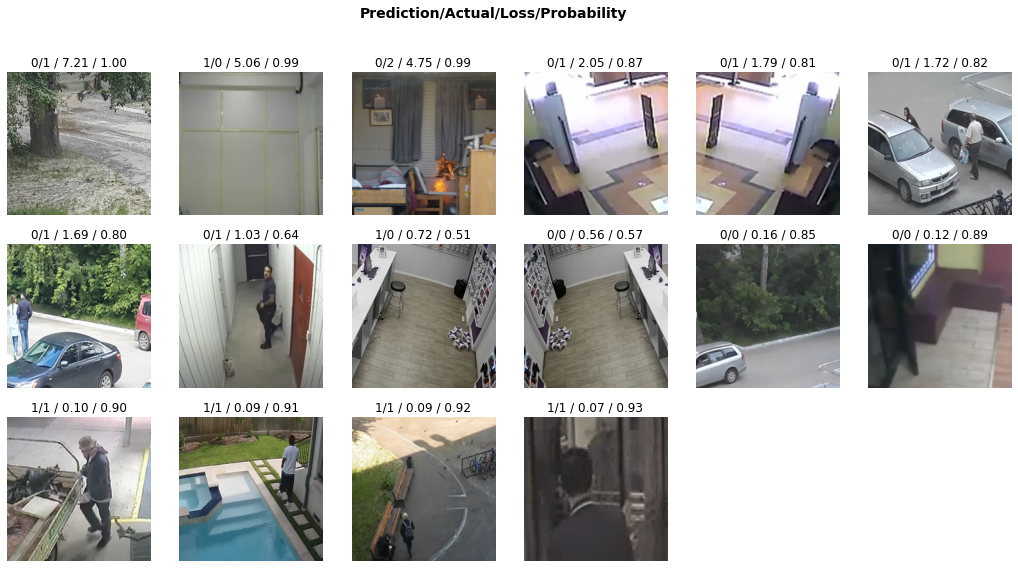

In [9]:
interp.plot_top_losses(16 ,nrows=3)

In [ ]:
test_your_image='/home/guardian/Documents/multiclassdata/2/90.jpg'

In [ ]:
test=Image.open(test_your_image)

In [ ]:
test.show()

In [10]:
learn.predict(test_your_image)

NameError: name 'test_your_image' is not defined

In [11]:
from fastai.vision.widgets import ImageClassifierCleaner

In [12]:
cleaner=ImageClassifierCleaner(learn)

In [13]:
cleaner

In [14]:
for idx,cat in cleaner.change():shutil.move(str(cleaner.fns[idx]),path/cat)

In [15]:
dls = data.dataloaders(path)
learn= cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(8)

RuntimeError: CUDA out of memory. Tried to allocate 14.00 MiB (GPU 0; 3.82 GiB total capacity; 2.49 GiB already allocated; 4.44 MiB free; 2.54 GiB reserved in total by PyTorch)

In [ ]:
interp =ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(16 ,nrows=3)

In [ ]:
cleaner=ImageClassifierCleaner(learn)
cleaner

In [18]:
learn.export()

In [19]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn_inf=load_learner(path/'export.pkl')

In [22]:
learn_inf.predict('/home/guardian/Downloads/test_images/images.jpeg')

('2', tensor(2), tensor([9.6278e-08, 1.4073e-01, 8.5927e-01]))